<a href="https://colab.research.google.com/github/Bhanureddy48/Electric-vehicles/blob/main/Bhanu_Battery_Range_Estimation_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
EVD= pd.read_csv("/content/Banu_Cheapestelectriccars-EVDatabase.csv") # Replace with your file name and its path


In [3]:
EVD.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [4]:
print(EVD.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [5]:
#filling empty data with 0

EVD=EVD.fillna('0')

In [6]:
#cleaning the data
#removing currency sign

PriceinUK=[]
for item in EVD['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
EVD['PriceinUK']=PriceinUK

In [7]:
PriceinGermany=[]
for item in EVD['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
EVD['PriceinGermany']=PriceinGermany

In [8]:
FastChargeSpeed=[]
for item in EVD['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
EVD['FastChargeSpeed']=FastChargeSpeed

In [9]:
Efficiency=[]
for item in EVD['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
EVD['Efficiency']=Efficiency

In [10]:
Range=[]
for item in EVD['Range']:
    Range+=[int(item.replace(' km',''))]
EVD['Range']=Range

In [11]:
TopSpeed=[]
for item in EVD['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
EVD['TopSpeed']=TopSpeed

In [12]:
Acceleration=[]
for item in EVD['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
EVD['Acceleration']=Acceleration

In [13]:
Subtitle=[]
for item in EVD['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
EVD['Subtitle']=Subtitle

In [14]:
EVD= EVD.rename(columns = {'Subtitle':'KWH'})

In [15]:
EVD.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830


In [16]:
EVD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 15.6+ KB


In [17]:
EVD_cor = EVD.drop(columns=['Name', 'Drive'])

In [18]:
EVD_cor

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
0,58.0,7.3,150,335,173,210,5,42990,0
1,31.0,22.4,130,160,194,0,5,0,31680
2,36.0,7.9,144,220,164,230,5,29990,25995
3,86.5,5.7,200,375,231,600,5,0,79900
4,83.7,2.8,260,390,215,860,4,186336,138830
...,...,...,...,...,...,...,...,...,...
175,65.0,7.9,200,340,191,390,5,40000,0
176,76.0,4.4,233,490,155,820,5,53560,0
177,57.0,7.7,185,340,168,340,5,0,26495
178,76.6,6.9,180,385,199,470,5,50900,0


In [19]:
EVD_cor.corr()


,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000


<Axes: >

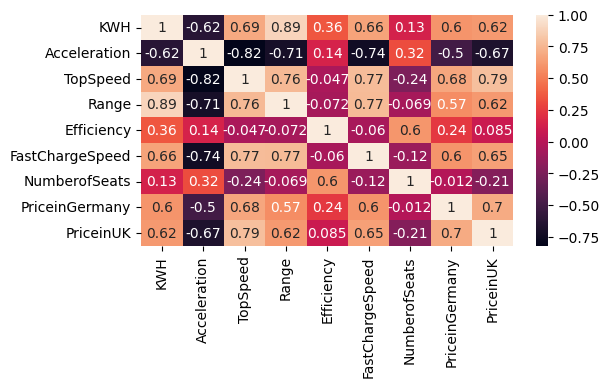

In [20]:
plt.figure(figsize=(6,3))
sns.heatmap(EVD_cor.corr(), annot=True)

<ipython-input-21-13be68605e75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drive', data=EVD, palette=custom_col)


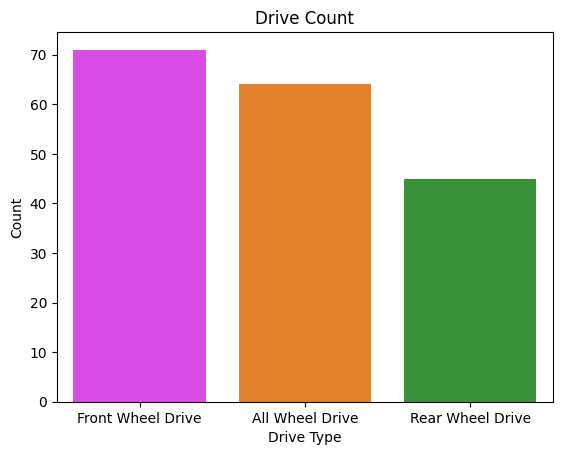

In [21]:
custom_col = ['#f033ff', '#ff7f0e', '#2ca02c']  # Replace with your desired colors

# Create a count plot with the custom palette
sns.countplot(x='Drive', data=EVD, palette=custom_col)

# Optional: Customize plot
plt.title('Drive Count')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.show()

<ipython-input-22-64353c9795e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumberofSeats', data=EVD,  palette=['#FF6347', '#4682B4', '#32CD32', '#33ff64'])


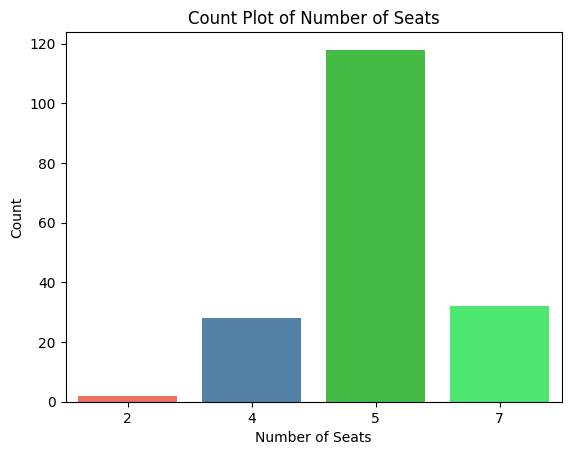

In [22]:
#
sns.countplot(x='NumberofSeats', data=EVD,  palette=['#FF6347', '#4682B4', '#32CD32', '#33ff64'])

plt.title("Count Plot of Number of Seats")
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='NumberofSeats', ylabel='count'>

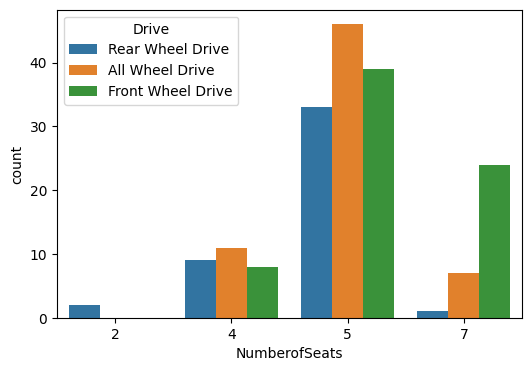

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=EVD)

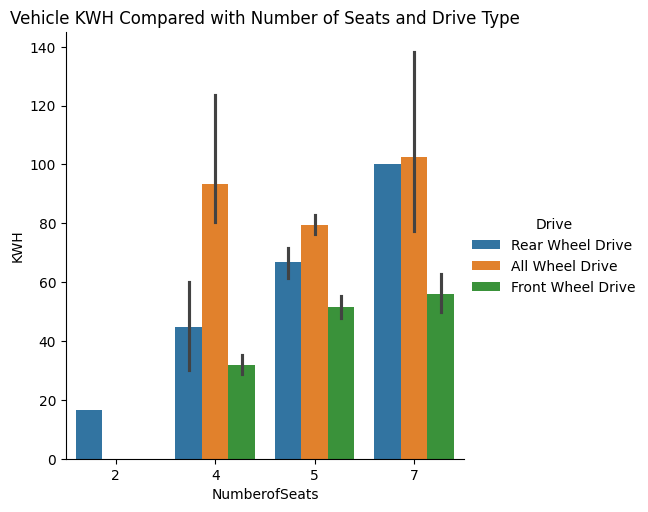

In [25]:
# Vehicle KWH Compared with Number of Seats and Drive Type
sns.catplot(data=EVD, kind="bar", x="NumberofSeats", y="KWH",height=5, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type")
plt.show()

Text(0.5, 1.0, 'Relationship Between KWH and Acceleration with Types of Wheel Drive')

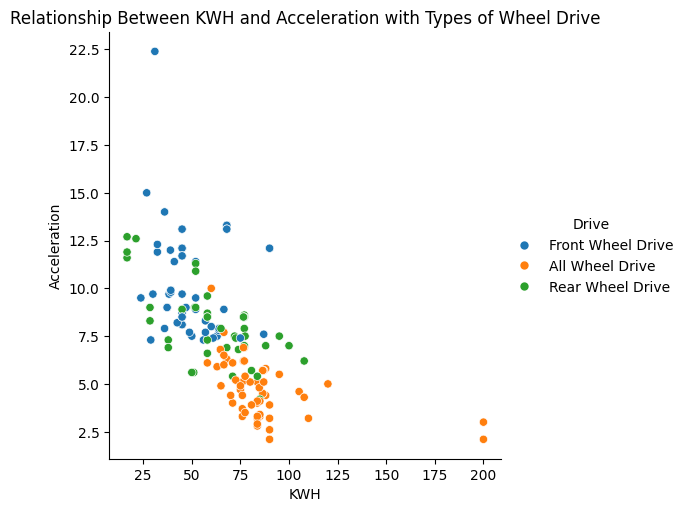

In [26]:
#Relationship Between KWH and Acceleration with Types of Wheel Drive
sns.relplot(x="KWH", y="Acceleration", height=5,hue="Drive",data=EVD)
plt.title("Relationship Between KWH and Acceleration with Types of Wheel Drive")

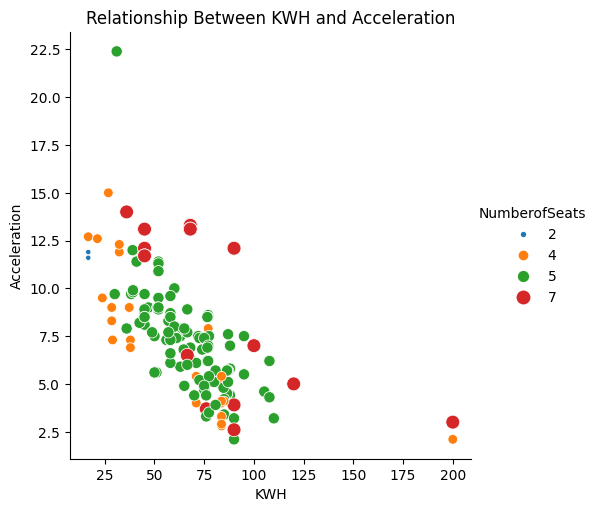

In [27]:
# Relation between KWH and Acceleration with no of seats
sns.relplot(
    x="KWH",
    y="Acceleration",
    size="NumberofSeats",
    hue="NumberofSeats",  # Assign different colors to 'NumberofSeats'
    height=5,
    sizes=(15, 100),  # Adjust bubble sizes
    palette="tab10",  # Choose a color palette (can be customized)
    data=EVD
)

plt.title("Relationship Between KWH and Acceleration")
plt.xlabel("KWH")
plt.ylabel("Acceleration")
plt.show()

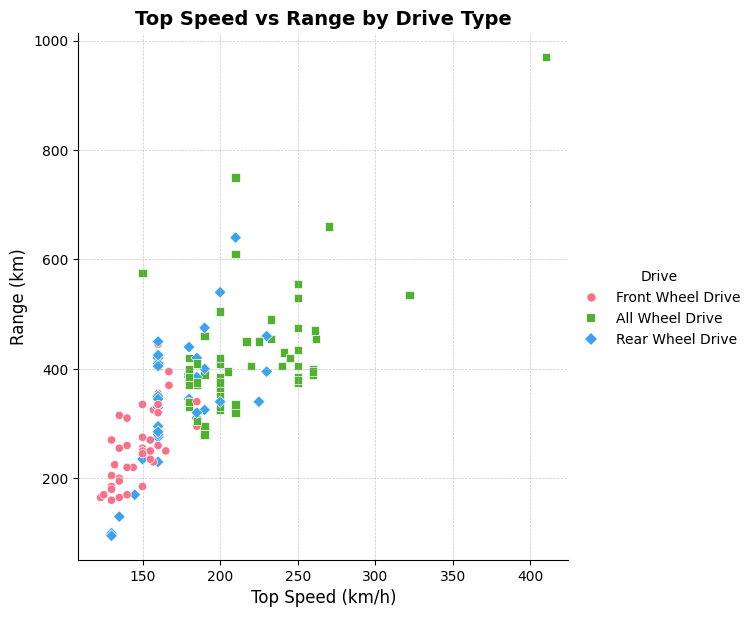

In [28]:
#Top Speed vs Range by Drive Type
sns.relplot(
    x="TopSpeed",
    y="Range",
    hue="Drive",
    style="Drive",  # Different marker styles for each hue group
    palette="husl",  # Vibrant color palette
    markers=["o", "s", "D"],  # Custom markers for styles
    height=6,
    data=EVD
)

plt.title("Top Speed vs Range by Drive Type", fontsize=14, fontweight='bold')
plt.xlabel("Top Speed (km/h)", fontsize=12)
plt.ylabel("Range (km)", fontsize=12)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

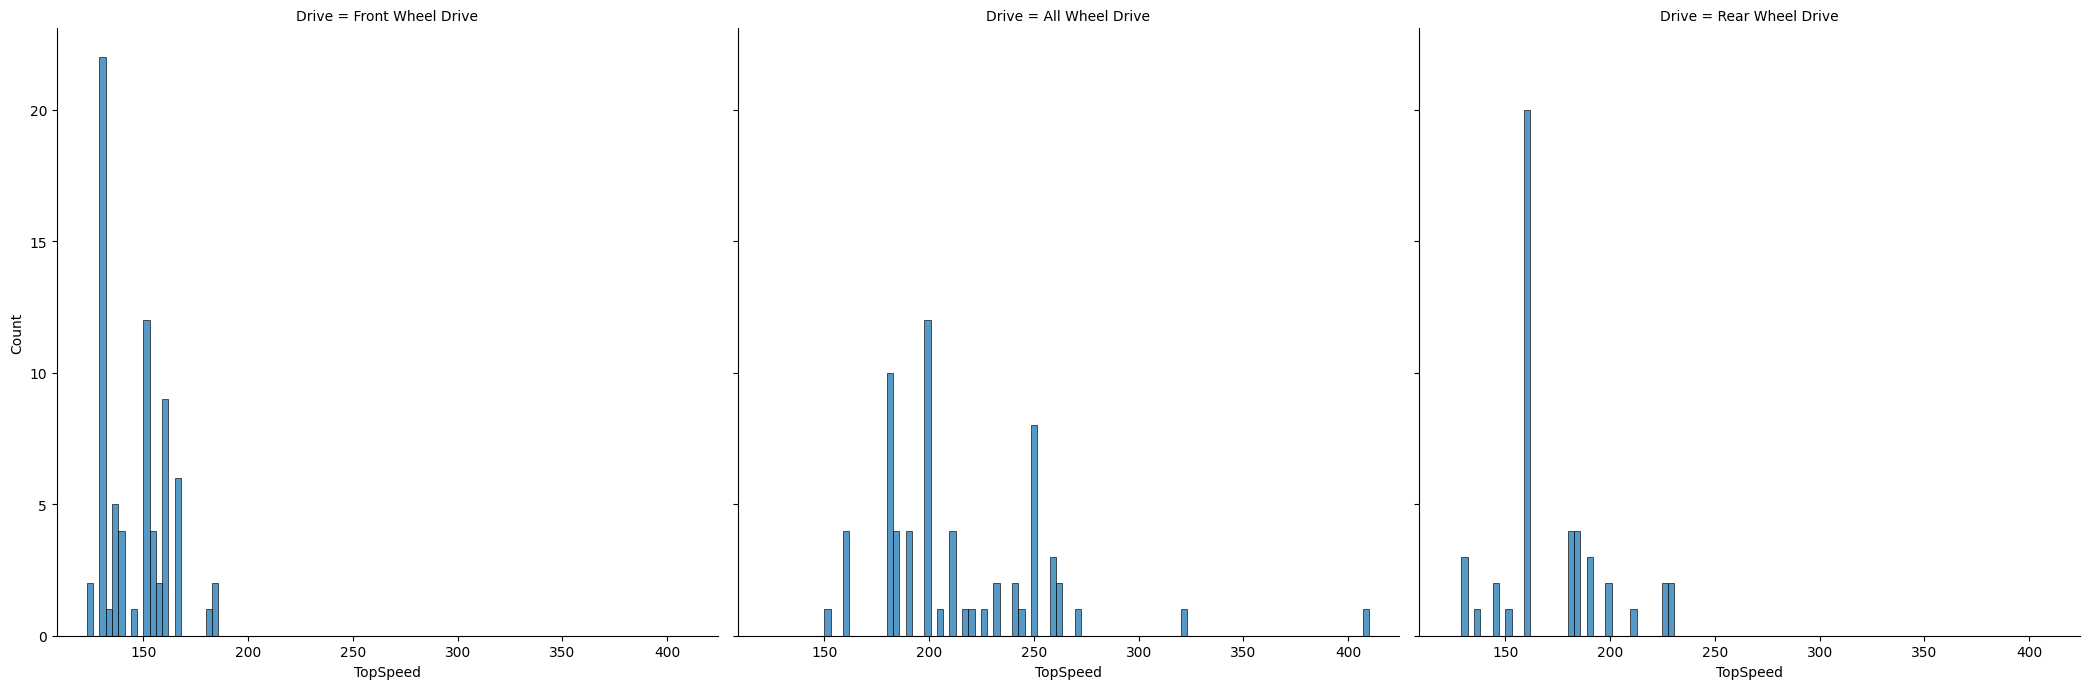

In [29]:
sns.displot(
    EVD, x="TopSpeed", col="Drive",
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

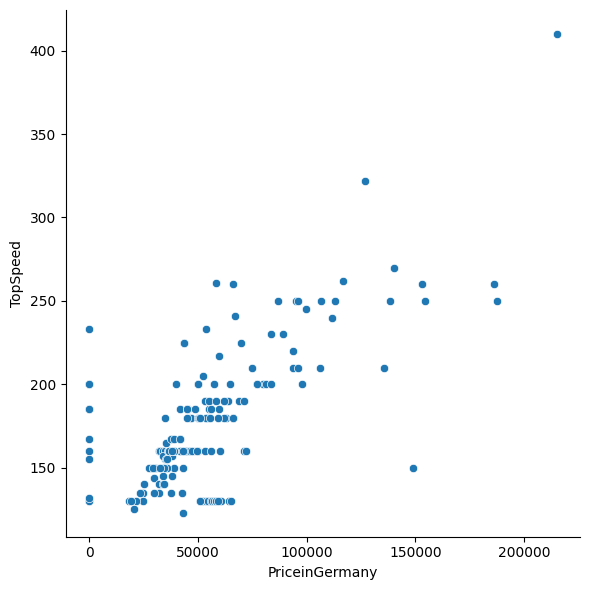

In [30]:
#relation between price and features
sns.relplot(x="PriceinGermany", y="TopSpeed", height=6,data=EVD)

<ipython-input-31-aabb521346f8>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


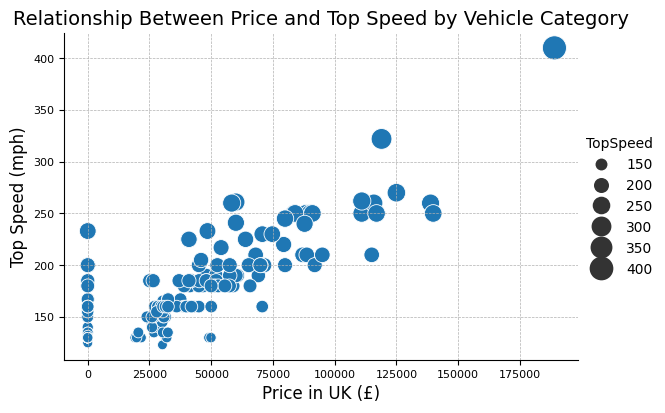

In [31]:
# Relationship Between Price and Top Speed by Vehicle Category
sns.relplot(
    x="PriceinUK",
    y="TopSpeed",
    # hue="Category",  # Use color to differentiate categories
    # style="Category",  # Different marker styles for categories
    size="TopSpeed",  # Adjust bubble size by TopSpeed
    sizes=(50, 300),  # Define size range for markers
    palette="coolwarm",  # Unique color palette for a vibrant look
    markers=["o", "s", "D", "^", "P"],  # Distinct markers
    height=4,
    aspect=1.5,  # Wider plot
    data=EVD
)

# Add titles and labels
plt.title("Relationship Between Price and Top Speed by Vehicle Category", fontsize=14)
plt.xlabel("Price in UK (£)", fontsize=12)
plt.ylabel("Top Speed (mph)", fontsize=12)

# Customize the grid and appearance
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show plot
plt.show()

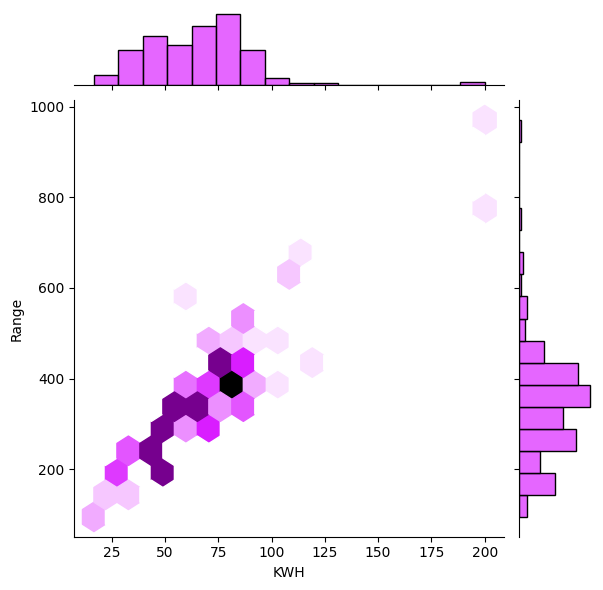

In [32]:
sns.jointplot(x=EVD["KWH"], y=EVD["Range"], kind="hex", color="#dd33ff")

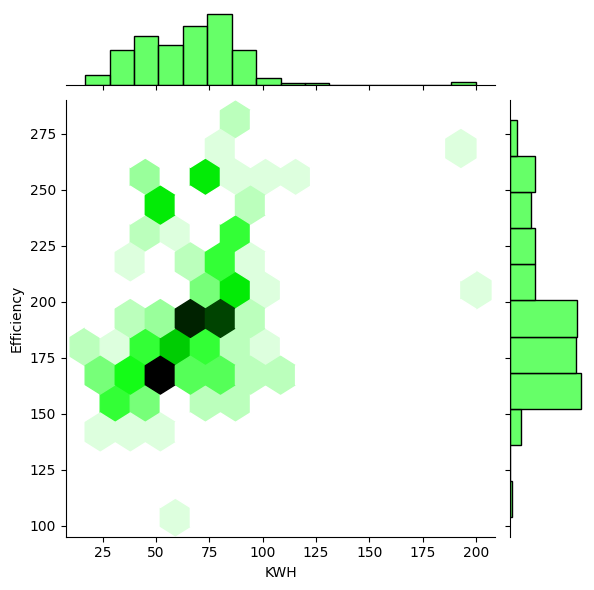

In [33]:
sns.jointplot(x=EVD["KWH"], y=EVD["Efficiency"], kind="hex", color="#33ff36")

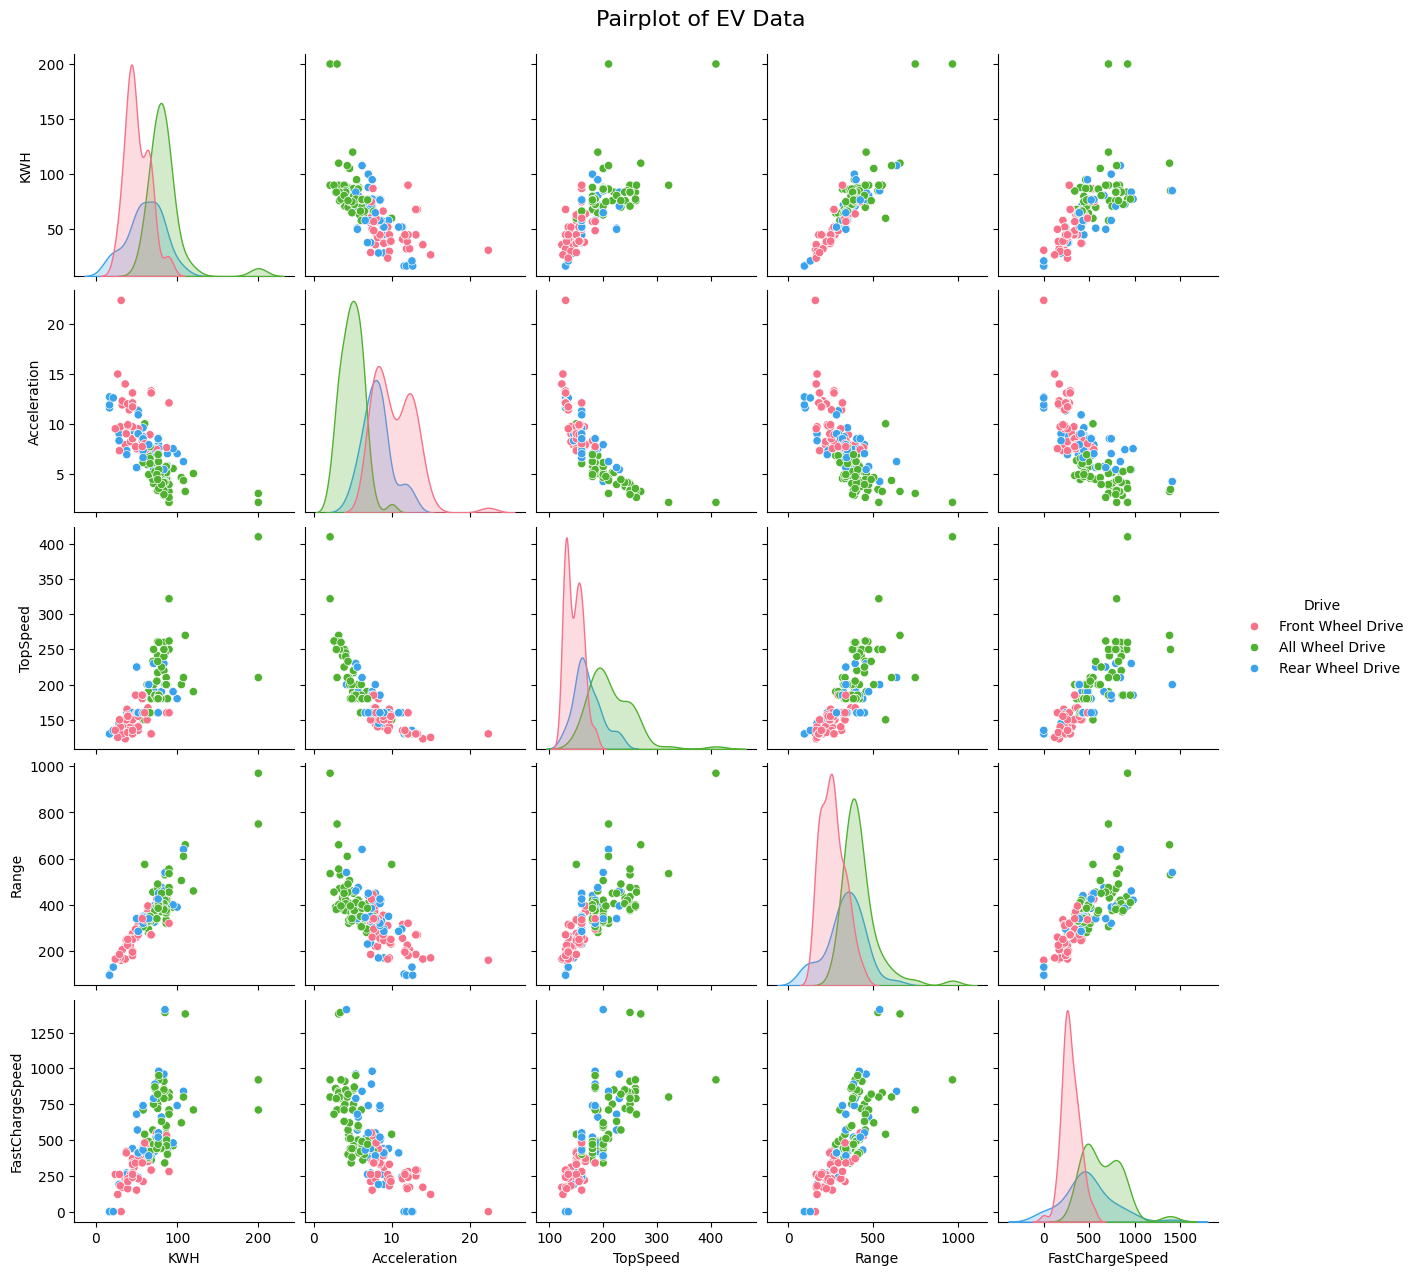

In [34]:
pairplot = sns.pairplot(
    EVD[["KWH", "Acceleration", "TopSpeed", "Range", "FastChargeSpeed", "Drive"]],
    hue="Drive",  # Assign a categorical variable
    palette="husl",  # Apply color palette to categories
    diag_kind="kde",  # Kernel Density Estimation for diagonal plots
    kind="scatter"  # Scatter plots for off-diagonal plots
)

# Customize individual plot styles (optional tweaks)
for ax in pairplot.diag_axes:  # Adjust diagonal plot aesthetics
    ax.set_facecolor("#f5f5f5")  # Light gray background

pairplot.fig.suptitle("Pairplot of EV Data", y=1.02, fontsize=16)  # Add a title
plt.show()


In [35]:
# Convert 'Drive' column to dummy variables (One-Hot Encoding)
EVD = pd.get_dummies(EVD, columns=['Drive'], drop_first=True)

In [36]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the target variable and feature variables

In [37]:
# Define the target variable and feature variables
X_EVD = EVD.drop(columns=['Name', 'KWH', 'Range','Drive_Front Wheel Drive', 'Drive_Rear Wheel Drive'])  # Features
y_EVD = EVD['Range']  # Target variable (Battery range)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_EVD, y_EVD, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (144, 7)
Test set size: (36, 7)


In [38]:
X_EVD

,Acceleration,TopSpeed,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
0,7.3,150,173,210,5,42990,0
1,22.4,130,194,0,5,0,31680
2,7.9,144,164,230,5,29990,25995
3,5.7,200,231,600,5,0,79900
4,2.8,260,215,860,4,186336,138830
...,...,...,...,...,...,...,...
175,7.9,200,191,390,5,40000,0
176,4.4,233,155,820,5,53560,0
177,7.7,185,168,340,5,0,26495
178,6.9,180,199,470,5,50900,0


In [39]:
y_EVD

,Range
0,335
1,160
2,220
3,375
4,390
...,...
175,340
176,490
177,340
178,385


In [40]:
X_EVD.head()

,Acceleration,TopSpeed,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
0,7.3,150,173,210,5,42990,0
1,22.4,130,194,0,5,0,31680
2,7.9,144,164,230,5,29990,25995
3,5.7,200,231,600,5,0,79900
4,2.8,260,215,860,4,186336,138830


# Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
EVD_DT_model = DecisionTreeRegressor(random_state=42)

# Train the model
EVD_DT_model.fit(X_train, y_train)

# Predict
y_pred_tree = EVD_DT_model.predict(X_test)




In [42]:
# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_tree)
r2_dt = r2_score(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
rmse_dt = np.sqrt(mse_dt)

print(f'Decision Tree - Mean Squared Error: {mse_dt}')
print(f'Decision Tree - R-squared: {r2_dt}')
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")

Decision Tree - Mean Squared Error: 19337.5
Decision Tree - R-squared: 0.07982511779214396
Mean Absolute Error (MAE): 72.50
Root Mean Squared Error (RMSE): 139.06


# K-Nearest Neighbors Regressor (KNN)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize the KNN model
EVD_knn_model = KNeighborsRegressor(n_neighbors=5)


In [44]:
# Train the model
EVD_knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [45]:
# Predict
y_pred_knn_EVD = EVD_knn_model.predict(X_test)

In [46]:
# Evaluate
mse_knn = mean_squared_error(y_test, y_pred_knn_EVD)
r2_knn = r2_score(y_test, y_pred_knn_EVD)
mae_knn = mean_absolute_error(y_test, y_pred_knn_EVD)
rmse_knn = np.sqrt(mse_knn)

In [47]:
print(f'K-Nearest Neighbors - Mean Squared Error: {mse_knn}')
print(f'K-Nearest Neighbors - R-squared: {r2_knn}')
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

K-Nearest Neighbors - Mean Squared Error: 16016.388888888889
K-Nearest Neighbors - R-squared: 0.23786018051823932
Mean Absolute Error (MAE): 81.11
Root Mean Squared Error (RMSE): 126.56


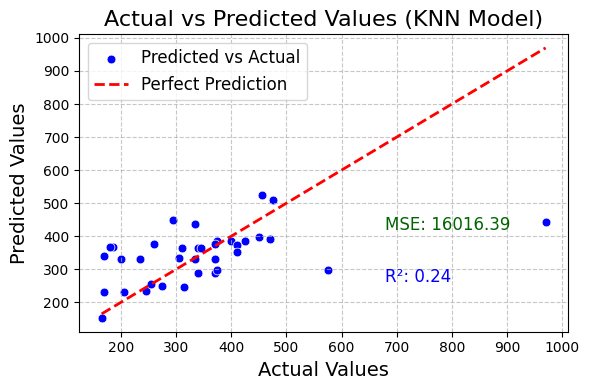

In [48]:
# Example metrics used for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn_EVD)
r2_knn = r2_score(y_test, y_pred_knn_EVD)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_knn_EVD, color='blue', s=40, label='Predicted vs Actual')

# Line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Add labels, title, and legend
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values (KNN Model)', fontsize=16)

# Annotate MSE and R² on the plot
plt.text(max(y_test) * 0.7, max(y_pred_knn_EVD) * 0.8, f'MSE: {mse_knn:.2f}', fontsize=12, color='darkgreen')
plt.text(max(y_test) * 0.7, max(y_pred_knn_EVD) * 0.5, f'R²: {r2_knn:.2f}', fontsize=12, color='blue')
# Add legend and grid
plt.legend(loc='upper left', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
test_input = np.array([[ 7.3	, 150, 173, 210, 5, 429990, 0]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test_KNN = EVD_knn_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test_KNN[0]} km")

Predicted Range for the input electric vehicle: 392.0 km


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [50]:
test_input = np.array([[ 22.4	, 150, 173, 210, 5, 42990, 0]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test_KNN = EVD_knn_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test_KNN[0]} km")

Predicted Range for the input electric vehicle: 366.0 km


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# XGBoost Regressor Model
XGBoost (Extreme Gradient Boosting) is an optimized gradient boosting model with improved performance.
## Best Model compared to other models

In [51]:
import xgboost as xgb

# Initialize the XGBoost Regressor
EVD_xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
EVD_xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = EVD_xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R-squared: {r2_xgb}')
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")

XGBoost - Mean Squared Error: 12201.005859375
XGBoost - R-squared: 0.4194151759147644
Mean Absolute Error (MAE): 53.29
Root Mean Squared Error (RMSE): 110.46


In [52]:

test_input = np.array([[ 7.3	, 150, 173, 210, 5, 429990, 0]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test = EVD_xgb_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test[0]} km")

Predicted Range for the input electric vehicle: 334.541259765625 km


In [53]:
test_input = np.array([[ 22.4	, 150, 173, 210, 5, 42990, 0]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test = EVD_xgb_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test[0]} km")

Predicted Range for the input electric vehicle: 252.7825927734375 km


In [54]:
test_input = np.array([[ 22.4	, 130, 194, 0, 5, 0, 31680]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test = EVD_xgb_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test[0]} km")

Predicted Range for the input electric vehicle: 160.00140380859375 km


In [55]:
test_input = np.array([[ 7.9	, 144, 164, 230, 5, 29990, 25995]])  # No extra feature included
# test_input_scaled = scaler.transform(test_input)  # Apply the same scaler used during training
# Step 3: Make predictions using the trained RandomForest Regressor model
y_pred_test = EVD_xgb_model.predict(test_input)

# Step 4: Print the prediction result
print(f"Predicted Range for the input electric vehicle: {y_pred_test[0]} km")

Predicted Range for the input electric vehicle: 220.0012969970703 km


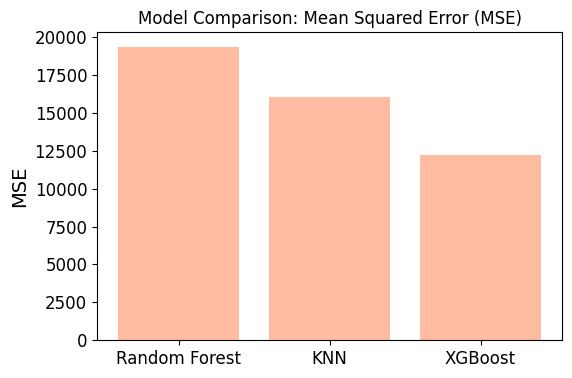

In [56]:
# Example metrics for the models (replace with actual values)
models = ['Random Forest', 'KNN', 'XGBoost']
mse_values = [mse_dt, mse_knn, mse_xgb]  # MSE for each model
r2_values = [r2_dt, r2_knn, r2_xgb]    # R² for each model

# Plot MSE
plt.figure(figsize=(6, 4))
plt.bar(models, mse_values, color='LightSalmon', alpha=0.7)
plt.title('Model Comparison: Mean Squared Error (MSE)', fontsize=12)
plt.ylabel('MSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



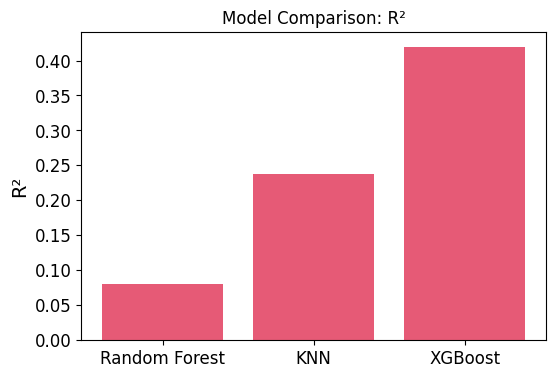

In [57]:
# Model Comparison: R²
plt.figure(figsize=(6, 4))
plt.bar(models, r2_values, color='Crimson', alpha=0.7)
plt.title('Model Comparison: R²', fontsize=12)
plt.ylabel('R²', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

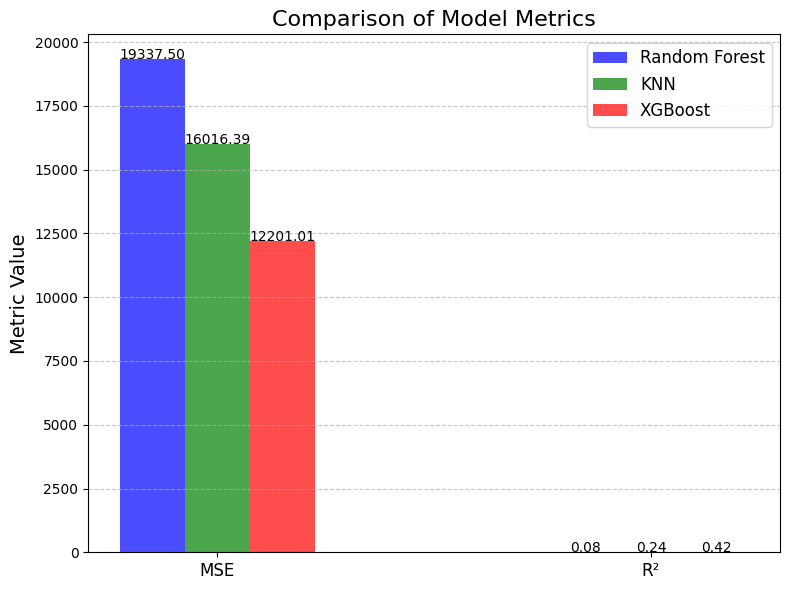

In [58]:
# Example metrics for the models (replace these with your computed values)
metrics = ['MSE', 'R²']

# Combine the metrics into lists
rf_metrics = [mse_dt, r2_dt]
knn_metrics = [mse_knn, r2_knn]
xgb_metrics = [mse_xgb, r2_xgb]

# Plot the metrics for each model
x = np.arange(len(metrics))  # Number of metrics
width = 0.15  # Width of the bars

plt.figure(figsize=(8, 6))

# Create bar plots for each model
plt.bar(x - width, rf_metrics, width, label='Random Forest', color='blue', alpha=0.7)
plt.bar(x, knn_metrics, width, label='KNN', color='green', alpha=0.7)
plt.bar(x + width, xgb_metrics, width, label='XGBoost', color='red', alpha=0.7)

# Add labels, title, and legend
plt.xticks(x, metrics, fontsize=12)
plt.ylabel('Metric Value', fontsize=14)
plt.title('Comparison of Model Metrics', fontsize=16)
plt.legend(loc='upper right', fontsize=12)

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7, axis='y')

# Annotate values on the bars
for i in range(len(metrics)):
    plt.text(x[i] - width, rf_metrics[i] + 0.1, f'{rf_metrics[i]:.2f}', ha='center', fontsize=10)
    plt.text(x[i], knn_metrics[i] + 0.1, f'{knn_metrics[i]:.2f}', ha='center', fontsize=10)
    plt.text(x[i] + width, xgb_metrics[i] + 0.1, f'{xgb_metrics[i]:.2f}', ha='center', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# # Plot MSE comparison
# plt.figure(figsize=(6, 4))
# plt.bar(['Decision Tree', 'KNN', 'XGBoost'], [mse_dt, mse_knn, mse_xgb], color=['Purple', 'SpringGreen', 'Aqua'], alpha=0.7)
# plt.title('Comparison of Models: Mean Squared Error (MSE)', fontsize=16)
# plt.ylabel('MSE', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

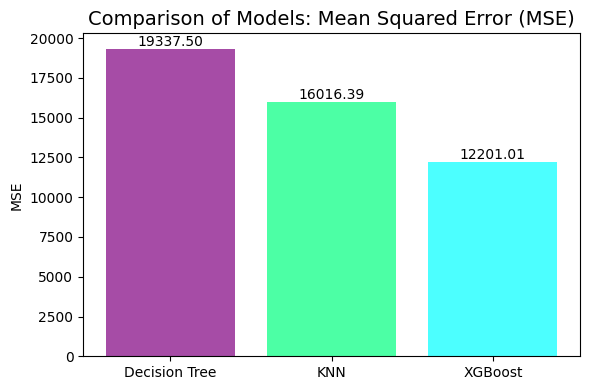

In [ ]:
# Plot MSE comparison
plt.figure(figsize=(6, 4))
bars = plt.bar(['Decision Tree', 'KNN', 'XGBoost'], [mse_dt, mse_knn, mse_xgb],
               color=['Purple', 'SpringGreen', 'Aqua'], alpha=0.7)

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Comparison of Models: Mean Squared Error (MSE)', fontsize=14)
plt.ylabel('MSE', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


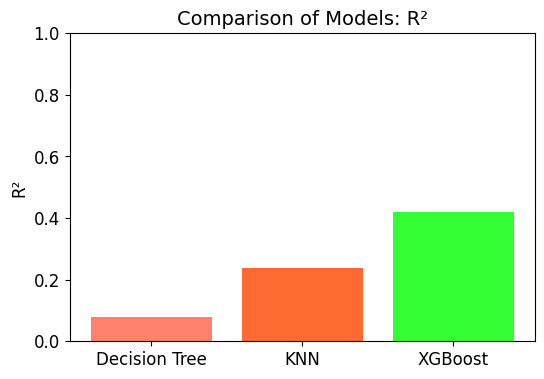

In [ ]:
# Plot R² comparison
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'KNN', 'XGBoost'], [r2_dt, r2_knn, r2_xgb], color=['Tomato', 'OrangeRed', 'Lime'], alpha=0.8)
plt.title('Comparison of Models: R²', fontsize=14)
plt.ylabel('R²', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.0)
plt.show()

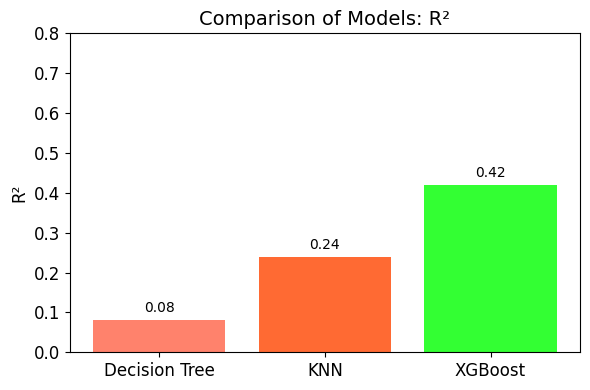

In [ ]:
Plot R² comparison
plt.figure(figsize=(6, 4))
models = ['Decision Tree', 'KNN', 'XGBoost']
r2_values = [r2_dt, r2_knn, r2_xgb]

# Create bar plot
bars = plt.bar(models, r2_values, color=['Tomato', 'OrangeRed', 'Lime'], alpha=0.8)

# Annotate the bars with R² values
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{value:.2f}', ha='center', fontsize=10)

# Customize the plot
plt.title('Comparison of Models: R²', fontsize=14)
plt.ylabel('R²', fontsize=12)
plt.ylim(0, 0.8)  # Ensure y-axis ranges from 0 to 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


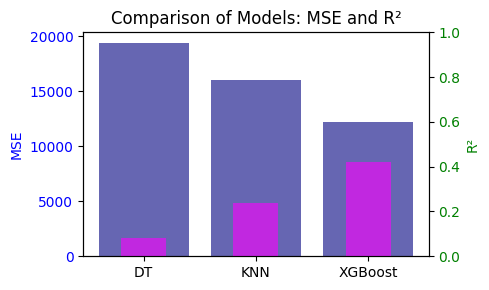

In [ ]:
# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(5, 3))

# Plot MSE on the primary y-axis
ax1.bar(['DT', 'KNN', 'XGBoost'], [mse_dt, mse_knn, mse_xgb], color='Navy', alpha=0.6, label='MSE')
ax1.set_ylabel('MSE', fontsize=10, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, max([mse_dt, mse_knn, mse_xgb]) + 1000)

# Plot R² on the secondary y-axis
ax2 = ax1.twinx()
ax2.bar(['DT', 'KNN', 'XGBoost'], [r2_dt, r2_knn, r2_xgb], color='Magenta', alpha=0.6, label='R²', width=0.4)
ax2.set_ylabel('R²', fontsize=10, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 1.0)

# Add title
plt.title('Comparison of Models: MSE and R²', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Comarision table
import plotly.graph_objects as go

# Example metrics for models
data = {
    'Model': ['Decision Tree', 'KNN', 'XGBoost'],
    'MSE': [mse_dt, mse_knn, mse_xgb],
    'R²': [r2_dt, r2_knn, r2_xgb],
    'MAE': [mae_dt, mae_knn, mae_xgb],
    'RMSE': [rmse_dt, rmse_knn, rmse_xgb]

}

# Create a Plotly Table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Model</b>", "<b>MSE</b>", "<b>R²</b>","<b>MAE</b>","<b>RMSE</b>"],
        fill_color="#264653",
        font=dict(color="white", size=14),
        align="center",
    ),
    cells=dict(
        values=[data['Model'], data['MSE'], data['R²'],data['MAE'],data['RMSE']],
        fill_color=["#e9f5db", "#f6c28b", "#d5a6bd","#82e0aa","#d2b4de"],
        font=dict(color="black", size=12),
        align="center",
    )
)])

# Customize layout
fig.update_layout(
    title="Model Performance Comparison",
    title_font=dict(size=18, family='Arial', color='#DE3163'),
    margin=dict(l=15, r=15, t=50, b=30),
)

# Show the table
fig.show()
